In [96]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### 1 Analyzing the Wikipedia voters network [9 points]

In [97]:
def get_len_reciprocated_edges(G):
    c=0
    for e in G.edges:
        if (e[0] != e[1]) and (e[1],e[0]) in G.edges:
                c+=1
    return int(c/2)

def get_len_out_degree(G, val_out_degree):
    out_degree_view = G.out_degree()
    c = 0
    for elem in out_degree_view:
        if elem[1] == val_out_degree:
            c+=1
    return c

def get_len_in_degree(G, val_in_degree):
    in_degree_view = G.in_degree()
    c = 0
    for elem in in_degree_view:
        if elem[1] == val_in_degree:
            c+=1
    return c

def get_len_out_degree_gt_10(G):
    out_degree_view = G.out_degree()
    c = 0
    for elem in out_degree_view:
        if elem[1] > 10:
            c+=1
    return c

def get_len_in_degree_lt_10(G):
    in_degree_view = G.in_degree()
    c = 0
    for elem in in_degree_view:
        if elem[1] < 10:
            c+=1
    return c

# file_name = "test_1.txt"
file_name = "Wiki-Vote.txt"
dG = nx.read_edgelist(file_name, create_using=nx.DiGraph)
uG = dG.to_undirected()
no_edges = dG.number_of_edges()
no_edges_uG = uG.number_of_edges()
a1 = dG.number_of_nodes() 
a2 = len(list(nx.selfloop_edges(dG)))
a3 = no_edges - a2
a4 = no_edges_uG - a2
a5 = get_len_reciprocated_edges(dG) 
a6 = get_len_out_degree(dG,0)
a7 = get_len_in_degree(dG,0)
a8 = get_len_out_degree_gt_10(dG)
a9 = get_len_in_degree_lt_10(dG)

print("The number of nodes in the network : ", a1)
print("The number of nodes with a self-edge (self-loop) : ", a2)
print("The number of directed edges in the network : ", a3)
print("The number of undirected edges in the network : ", a4)
print("The number of reciprocated edges in the network : ", a5)
print("The number of nodes of zero out-degree : ", a6)
print("The number of nodes of zero in-degree : ", a7)
print("The number of nodes with more than 10 outgoing edges : ", a8)
print("The number of nodes with fewer than 10 incoming edges : ", a9)

The number of nodes in the network :  7115
The number of nodes with a self-edge (self-loop) :  0
The number of directed edges in the network :  103689
The number of undirected edges in the network :  100762
The number of reciprocated edges in the network :  2927
The number of nodes of zero out-degree :  1005
The number of nodes of zero in-degree :  4734
The number of nodes with more than 10 outgoing edges :  1612
The number of nodes with fewer than 10 incoming edges :  5165


### 2 Further Analyzing the Wikipedia voters network [6 points]

Text(0, 0.5, 'Count')

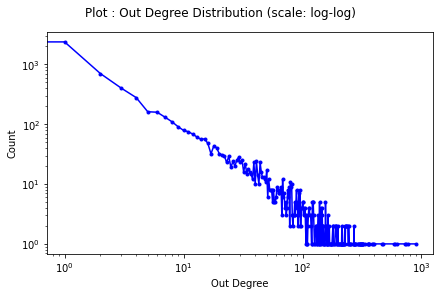

In [98]:
list_od = dG.out_degree()
list_sod = sorted(list_od, key=lambda tup: tup[1])
min_x = list_sod[0][1]
max_x = list_sod[-1][1]
dict_od = {}
for elem in list_sod:
    if elem[1] not in dict_od.keys():
        dict_od[elem[1]] = 1
    else:
        dict_od[elem[1]] += 1
list_x = []
list_y = []
for k,v in dict_od.items():
    list_x.append(k)
    list_y.append(v)
fig1 = plt.figure(constrained_layout=True)
spec1 = gridspec.GridSpec(ncols=1, nrows=1, figure=fig1)
ax1 = fig1.add_subplot(spec1[0, 0])
fig1.suptitle('Plot : Out Degree Distribution (scale: log-log)')
# ax1.plot(list_x, list_y, color='blue', marker='.')
ax1.loglog(list_x, list_y, color='blue', marker='.')
ax1.set_xlabel('Out Degree')
ax1.set_ylabel('Count')

### 3 Finding Experts on the Java Programming Language on StackOverflow[5 points]

In [99]:
file_name = "stackoverflow-java.txt"
dG_stack = nx.read_edgelist(file_name, create_using=nx.DiGraph)
no_wcc_stack = len(list(nx.weakly_connected_components(dG_stack)))
largest_wcc_stack = dG_stack.subgraph(sorted(nx.weakly_connected_components(dG_stack), key=len, reverse=True)[0])
no_nodes_lwccs = largest_wcc_stack.number_of_nodes()
no_edges_lwccs = largest_wcc_stack.number_of_edges()
print("1. The number of weakly connected components in the network : ", no_wcc_stack)
print("2a. The number of nodes in the largest weakly connected component : ", no_nodes_lwccs)
print("2b. The number of edges in the largest weakly connected component : ", no_edges_lwccs)

1. The number of weakly connected components in the network :  10143
2a. The number of nodes in the largest weakly connected component :  131188
2b. The number of edges in the largest weakly connected component :  322486


### 4 Network Characteristics [40 points]:
Erdos-Renyi Random graph (G(n, m) random network): Generate a random instance of this model by
using n = 5242 nodes and picking m = 14484 edges at random. Write code to construct instances of
this model, i.e., do not call the NetworkX function. Compare your results (major properties like degree
distribution, clustering coefficient, and diameter) with the NetworkX implementation.

Small-World Random Network: Generate an instance from this model as follows: begin with n = 5242
nodes arranged as a ring, i.e., imagine the nodes form a circle and each node is connected to its two
direct neighbors (e.g., node 399 is connected to nodes 398 and 400), giving us 5242 edges. Next,
connect each node to the neighbors of its neighbors (e.g., node 399 is also connected to nodes 397
and 401). This gives us another 5242 edges. Finally, randomly select 4000 pairs of nodes not yet
connected and add an edge between them. In total, this will make m = 5242 · 2 + 4000 = 14484 edges.
Write code to construct instances of this model, i.e., do not call a NetworkX function. Report the
properties of this network.

In [ ]:
class custom_Gnm:
    def __init__(n,m,directed=False):
        self.n = n
        self.m = m
        self.directed = directed
        self.nodes = []
import random
rr = random.random()

In [ ]:
import matplotlib.pyplot as plt
from networkx import nx

n = 10  # 10 nodes
m = 20  # 20 edges

G = nx.gnm_random_graph(n, m)

# some properties
print("node degree clustering")
for v in nx.nodes(G):
    print(f"{v} {nx.degree(G, v)} {nx.clustering(G, v)}")

print()
print("the adjacency list")
for line in nx.generate_adjlist(G):
    print(line)

nx.draw(G)
plt.show()

### 5 Random Graphs with Clustering [40 points]
Consider the following random graph model with clustering. For n nodes, we have distinct
‘triplets’. For each triplet, with independent probability p we connect the nodes belonging to this
triplet in the graph using three edges to form a triangle, where , where c is a constant.
Assume n is very large.
Question: Prove that the expected degree in this model is 2c. [Hint: expected degree of a node u in
this generative model is equal to twice the expected number of triangles incident on u]
Question: What is the clustering coefficient C? What is the value of C as n tends to infinity?
Question: Implement this model to computationally derive degree distribution, diameter, and
clustering coefficient.
